In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Exibição melhor de gráficos
sns.set(style="whitegrid")


In [2]:
# Simulação de dados com 4 features
np.random.seed(42)

# Dados normais (benignos)
benignos = pd.DataFrame({
    "threat_score": np.random.randint(0, 30, 100),
    "file_size": np.random.normal(1500, 300, 100).astype(int),
    "is_php": np.zeros(100),
    "is_js": np.zeros(100)
})

# Dados maliciosos (anomalias)
maliciosos = pd.DataFrame({
    "threat_score": np.random.randint(80, 100, 20),
    "file_size": np.random.normal(100, 30, 20).astype(int),
    "is_php": np.ones(20),
    "is_js": np.zeros(20)
})

# Juntando os dados
df = pd.concat([benignos, maliciosos], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)  # embaralhar
df.head()


,threat_score,file_size,is_php,is_js
0,88,118,1.0,0.0
1,3,1819,0.0,0.0
2,22,1608,0.0,0.0
3,27,2038,0.0,0.0
4,16,1603,0.0,0.0


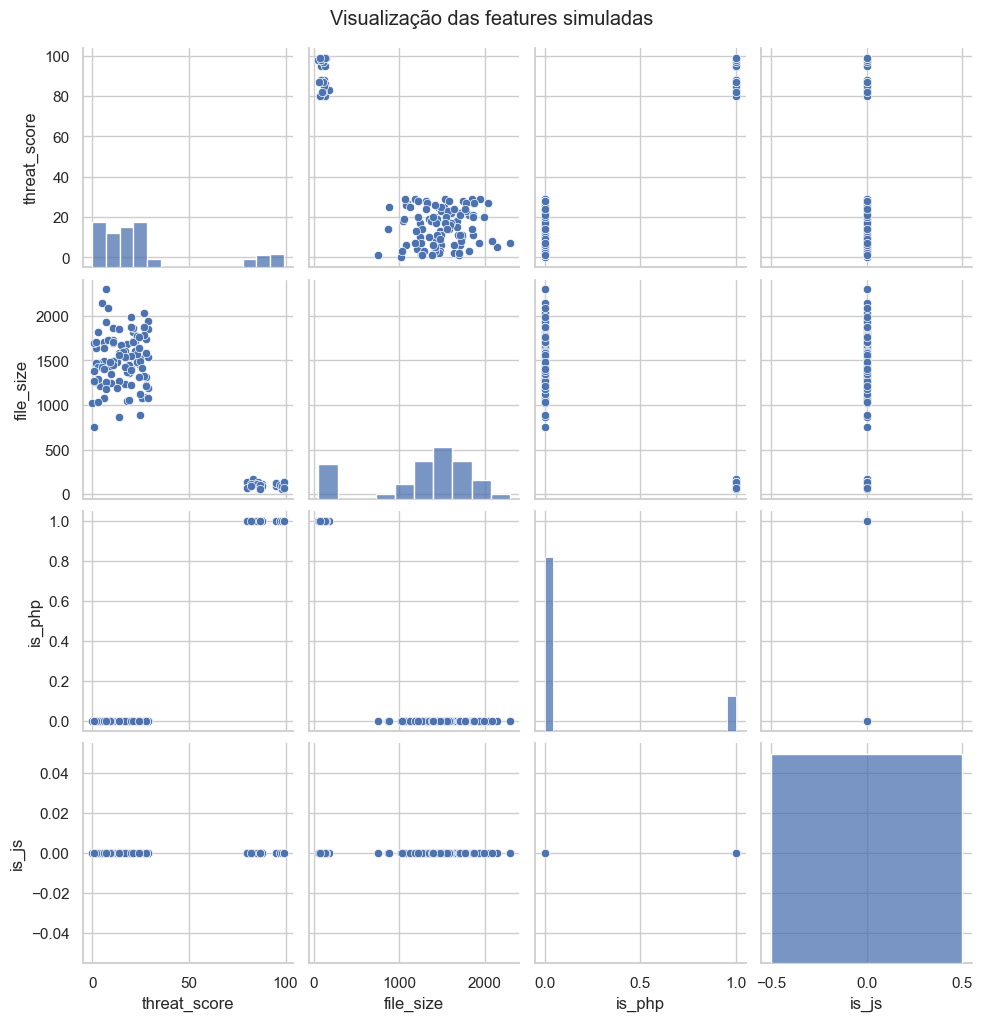

In [3]:
sns.pairplot(df)
plt.suptitle("Visualização das features simuladas", y=1.02)
plt.show()


In [4]:
# Seleção de colunas
features = ['threat_score', 'file_size', 'is_php', 'is_js']
X = df[features]

# Treinamento do modelo de detecção de anomalias
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(X)

print("Modelo treinado com sucesso!")


Modelo treinado com sucesso!


In [5]:
joblib.dump(model, "imunno_model.joblib")
print("Modelo salvo como 'imunno_model.joblib'")


Modelo salvo como 'imunno_model.joblib'


In [6]:
# Exemplo de entrada simulada
exemplo = pd.DataFrame([{
    "threat_score": 95,
    "file_size": 120,
    "is_php": 1,
    "is_js": 0
}])

pred = model.predict(exemplo)
print("Predição:", "Anomalia" if pred[0] == -1 else "Normal")


Predição: Anomalia
